<a href="https://colab.research.google.com/github/wangpouwei/Paul/blob/master/dlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import keras


In [24]:
from keras.datasets.mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


2


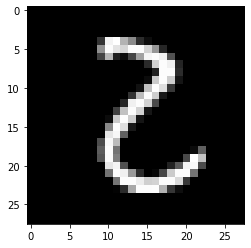

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0,5999)
print(y_train[c])
plt.imshow(x_train[c], cmap= "gray")

In [27]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,51,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,144,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,68,...,82,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,240,37,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,252,45,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,205,21,0,0,0,0,0,0,0,0


In [28]:
# 資料預先處理
# 1. 題目預先處理(Normalize)
# keras 在準備隨機那組weights, 跟Normmalize的圖片比較搭
# 1. 第一種方式： 0-1 第二種方式： -1 - 1
# 攤開 => keras MLP 規定一定要攤開成為1維
x_train_shape = x_train.reshape(60000,784)/255
x_test_shape = x_test.reshape(10000,784)/255
x_train_shape[0]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [30]:
# 2.答案預先處理()
# 希望的樣子[p1, p2, p3, ...p9]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("原來", y_train[1])
print("後來", y_train_cat[1])

原來 0
後來 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
from keras.layers.attention.multi_head_attention import activation
# 建立模型
# 第一種：蛋糕支架(Sequential，堆上一層(layers)
# layers：Dense(全連接層)
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
# 第一層`: input_dim => 告訴他輸入有幾個
# param：784 * 128 + 128(bias) =100480
mlp.add(Dense(128, activation="relu", input_dim=784))
# param：128 * 10(神經元的連結) + 10 (10個輸出， 10個激活 => 十個偏差)
mlp.add(Dense(10, activation="softmax"))
mlp.summary()
